In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diwali-sales/Diwali Sales Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/diwali-sales/Diwali Sales Data.csv", encoding='latin1')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.tail(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11241,1003032,Matthias,P00058042,F,26-35,33,0,Delhi,Central,Hospitality,Office,3,384.0,NaN,NaN
11242,1004344,Hildebrand,P00185442,F,26-35,27,1,Delhi,Central,Healthcare,Office,2,382.0,NaN,NaN
11243,1005446,Sheetal,P00297742,M,51-55,53,0,Gujarat,Western,Healthcare,Office,1,382.0,NaN,NaN
11244,1005446,Sheetal,P00297742,M,51-55,53,0,Madhya Pradesh,Central,Healthcare,Office,2,382.0,NaN,NaN
11245,1004140,Bertelson,P00057442,F,26-35,31,1,Delhi,Central,Aviation,Office,2,381.0,NaN,NaN
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.shape

(11239, 13)

In [13]:
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtype

dtype('int64')

In [15]:
df.duplicated().value_counts()

False    11231
True         8
Name: count, dtype: int64

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.duplicated().value_counts()

False    11231
Name: count, dtype: int64

In [18]:
df[['Age','Marital_Status','Orders','Amount']].describe()

,Age,Marital_Status,Orders,Amount
count,11231.000000,11231.000000,11231.000000,11231.000000
mean,35.411985,0.419998,2.489093,9454.084676
std,12.756116,0.493580,1.114880,5221.728074
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12677.500000
max,92.000000,1.000000,4.000000,23952.000000


In [19]:
k = df.describe(include = "object")
k

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11231,11231,11231,11231,11231,11231,11231,11231
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7828,4536,1942,4287,1581,2653


In [20]:
for i in k.columns:
    print(i)
    print(df[i].unique())
    print("\n")

Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']


Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']


Gender
['F' 'M']


Age Group
['26-35' '0-17' '18-25' '51-55' '46-50' '55+' '36-45']


State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Jharkhand' 'Kerala' 'Haryana'
 'Madhya Pradesh' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']


Zone
['Western' 'Southern' 'Central' 'Northern' 'Eastern']


Occupation
['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'Media' 'Banking' 'Retail' 'IT Sector' 'Aviation' 'Hospitality'
 'Agriculture' 'Textile' 'Chemical']


Product_Category
['Auto' 'Hand & Power Tools' 'Stationery' 'Tupperware' 'Footwear & Shoes'
 'Furniture' 'Food' 'Games & Toys' 'Sports Products' 'Books'
 'Electronics & Gadgets' 'Decor' 'Clothing & Apparel' 'Beauty'
 'Household items' 'Pet Care' 'Veterinary' 'Office']




**"Exploratory Data Analysis"**

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Gender**

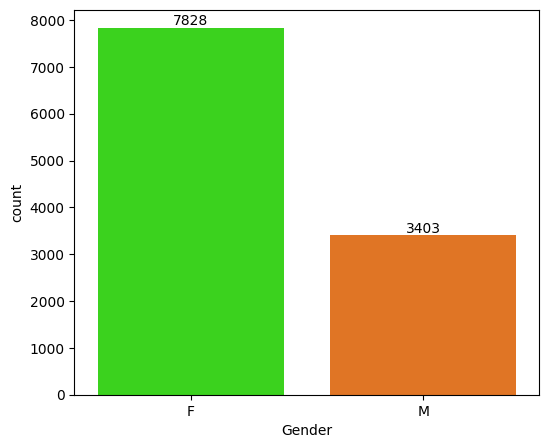

In [22]:
plt.figure(figsize = (6,5))
gen = sns.countplot(x = 'Gender', data = df, palette="gist_ncar")
for bars in gen.containers:
    gen.bar_label(bars)
plt.show()

In [23]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

,Gender,Amount
0,F,74307679
1,M,31871146


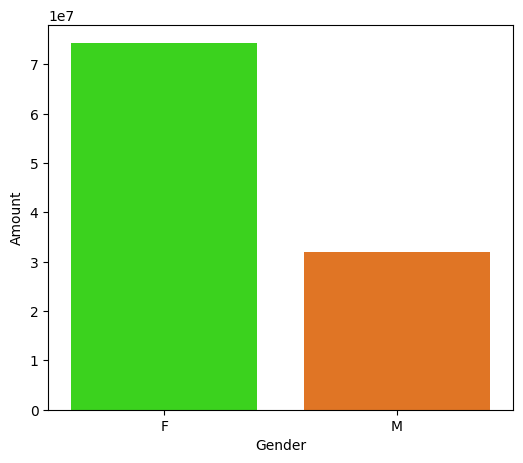

In [24]:
plt.figure(figsize = (6,5))
sales = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales, palette="gist_ncar")
plt.show()

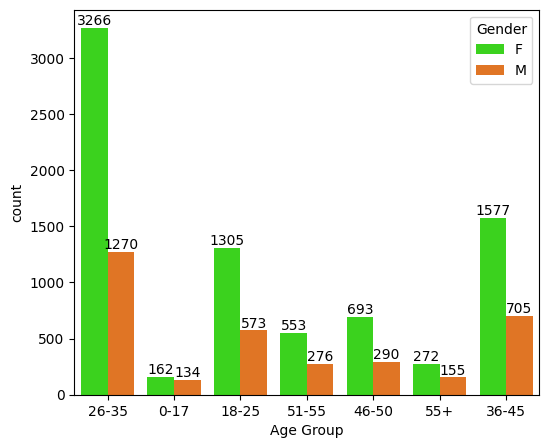

In [25]:
plt.figure(figsize = (6,5))
ga = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette="gist_ncar")
for bars in ga.containers:
    ga.bar_label(bars)
plt.show()

**Age**

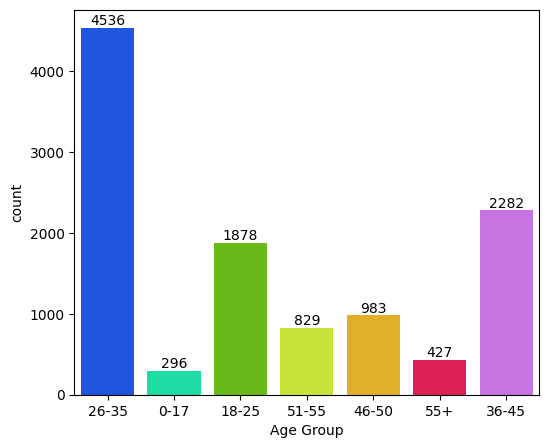

In [26]:
plt.figure(figsize = (6,5))
ag = sns.countplot(data = df, x = 'Age Group', palette="gist_ncar")
for bars in ag.containers:
    ag.bar_label(bars)
plt.show()

In [27]:
df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909
6,55+,4080987
0,0-17,2699653


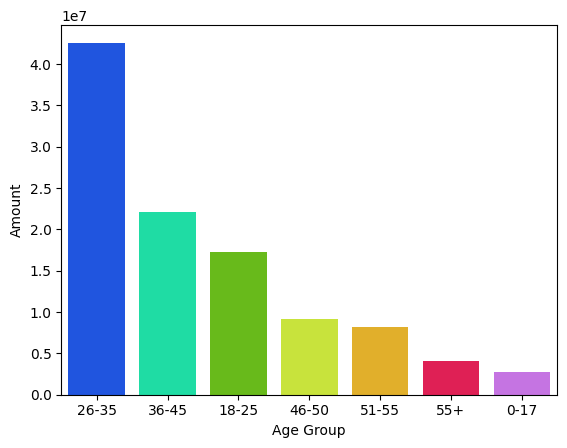

In [28]:
ab = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = ab, palette = "gist_ncar")
plt.show()

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Marital_Status**

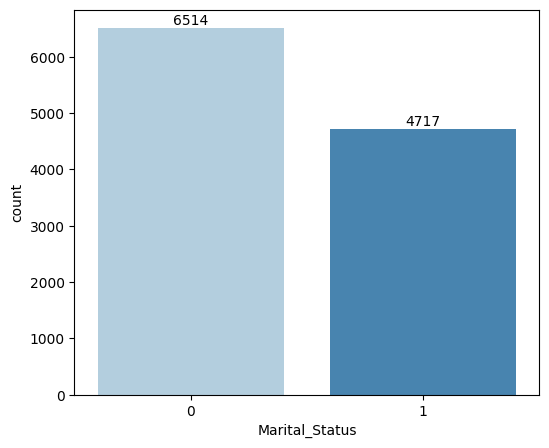

In [30]:
plt.figure(figsize = (6,5))
g = sns.countplot(x = 'Marital_Status', data = df, palette = "Blues")
for bars in g.containers:
    g.bar_label(bars)
plt.show()

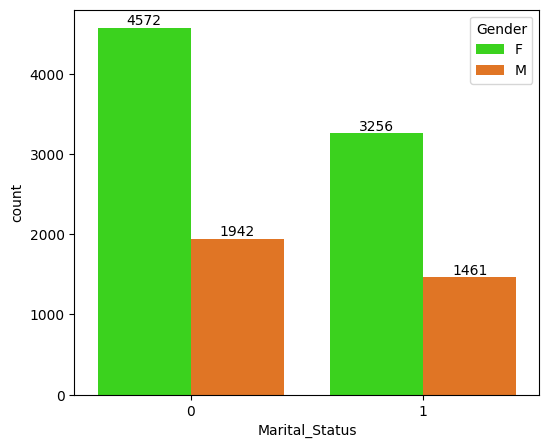

In [31]:
plt.figure(figsize = (6,5))
g = sns.countplot(x = 'Marital_Status',hue = "Gender", data = df, palette = "gist_ncar")
for bars in g.containers:
    g.bar_label(bars)
plt.show()

 **State**

In [32]:
df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).sort_index()

,State,Amount
0,Andhra Pradesh,8037146
1,Bihar,4014669
2,Delhi,11603818
3,Gujarat,3938159
4,Haryana,4217871
5,Himachal Pradesh,4963368
6,Jharkhand,3026456
7,Karnataka,13523540
8,Kerala,3894491
9,Madhya Pradesh,8101142


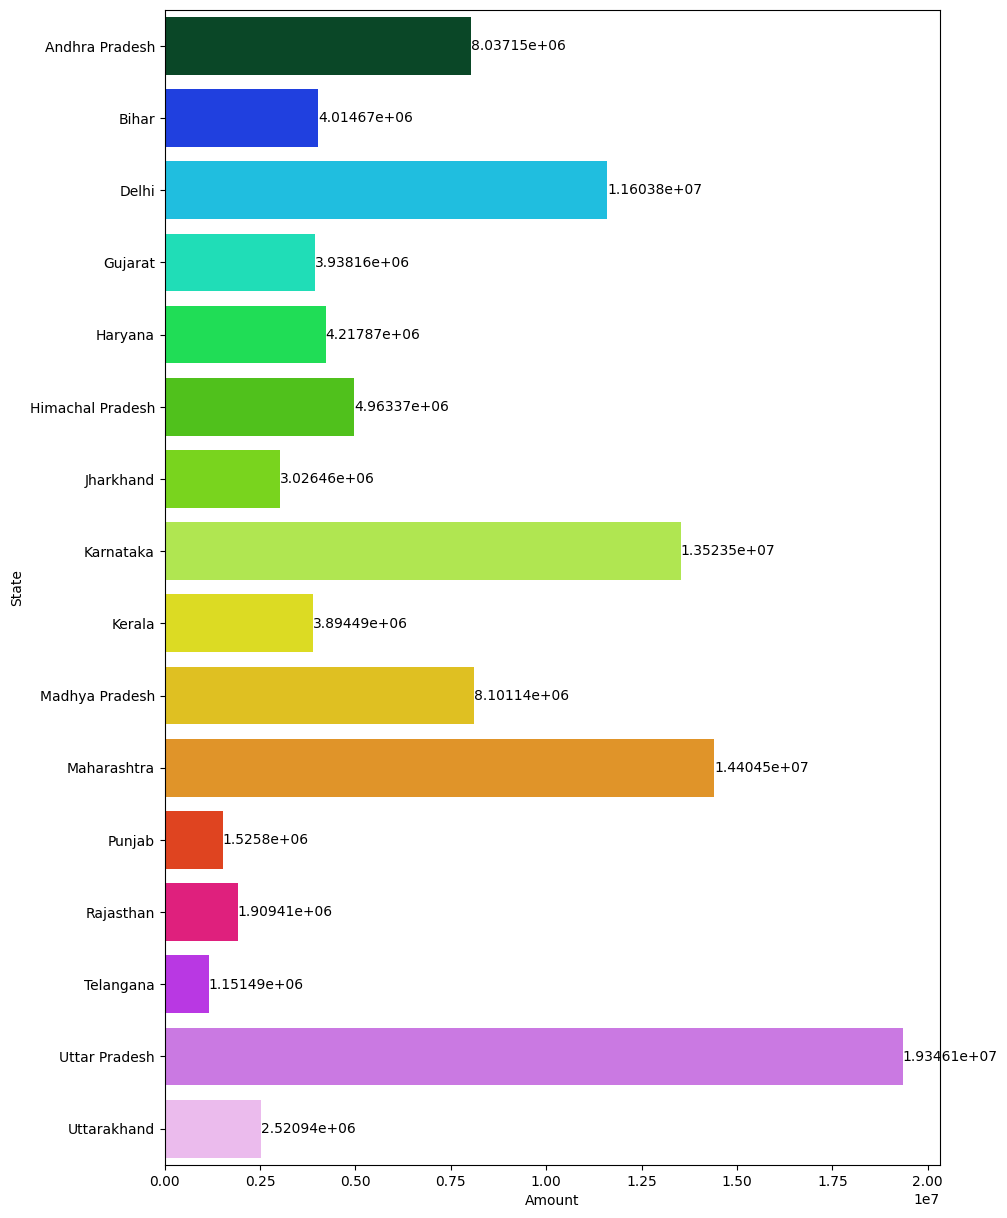

In [33]:
plt.figure(figsize = (10,15))
dg = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).sort_index()
nn = sns.barplot(x = "Amount", y = "State", data = dg, palette = "gist_ncar")
for i in nn.containers:
    nn.bar_label(i)
plt.show()

In [34]:
df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).sort_index()

,State,Orders
0,Andhra Pradesh,2051
1,Bihar,1058
2,Delhi,2740
3,Gujarat,1063
4,Haryana,1106
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3240
8,Kerala,1137
9,Madhya Pradesh,2252


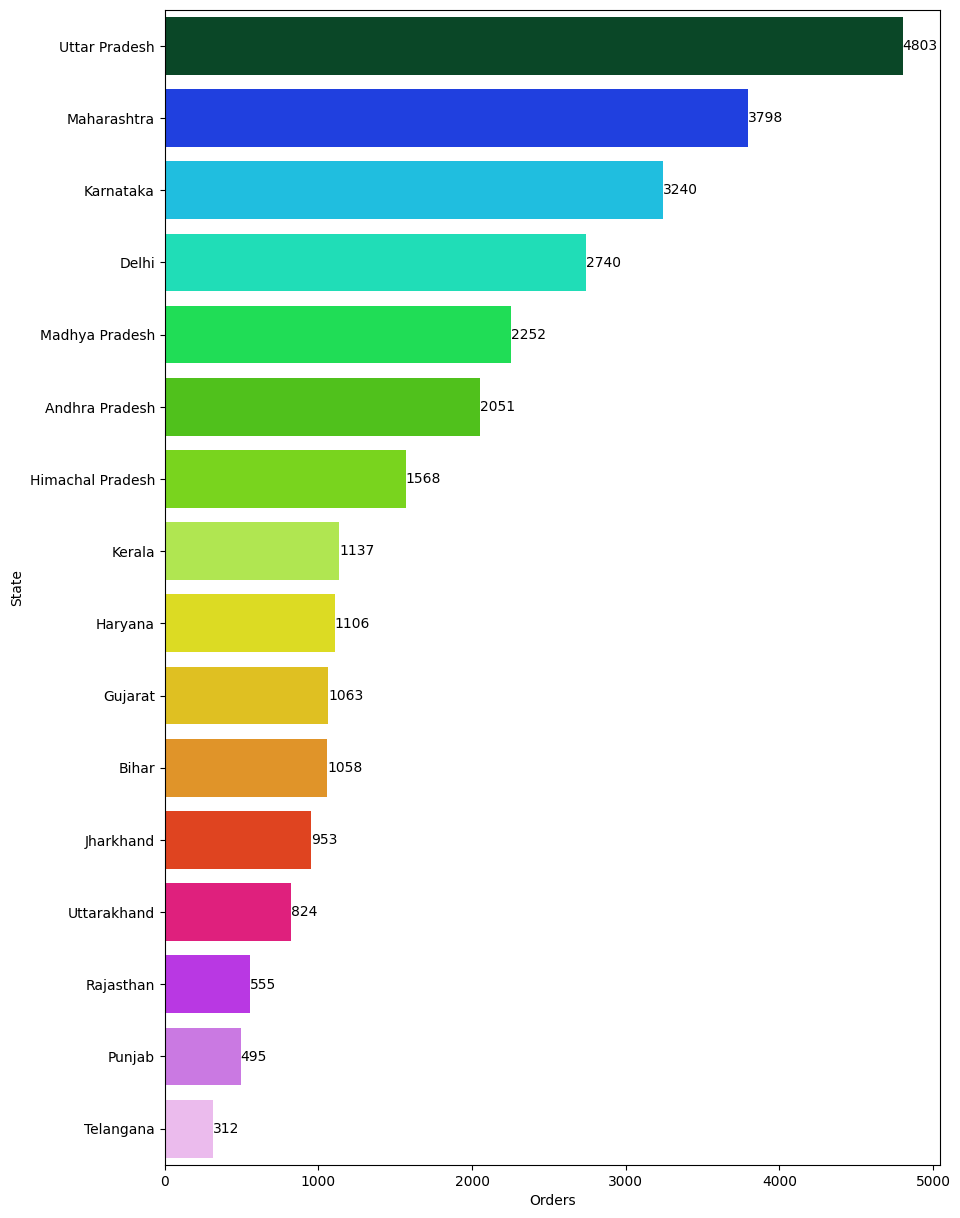

In [35]:
plt.figure(figsize = (10,15))
dk = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False)
nm = sns.barplot(y = "State", x = "Orders", data = dk, palette = "gist_ncar")
for i in nm.containers:
    nm.bar_label(i)
plt.show()

**Occupation**

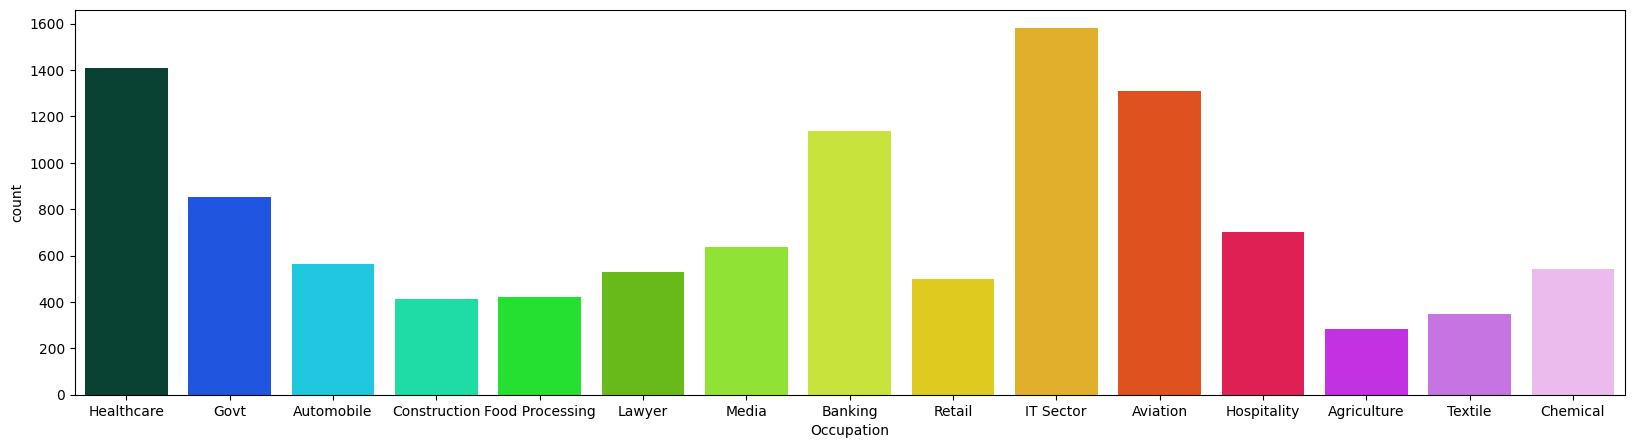

In [36]:
plt.figure(figsize = (20,5))
sns.countplot(x = "Occupation", data = df, palette = "gist_ncar")
plt.show()

In [37]:
saleoc = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).sort_index()
saleoc

,Occupation,Amount
0,Agriculture,2584999
1,Automobile,5368596
2,Aviation,12599994
3,Banking,10770610
4,Chemical,5297436
5,Construction,3589588
6,Food Processing,4070670
7,Govt,8517212
8,Healthcare,13034586
9,Hospitality,6337633


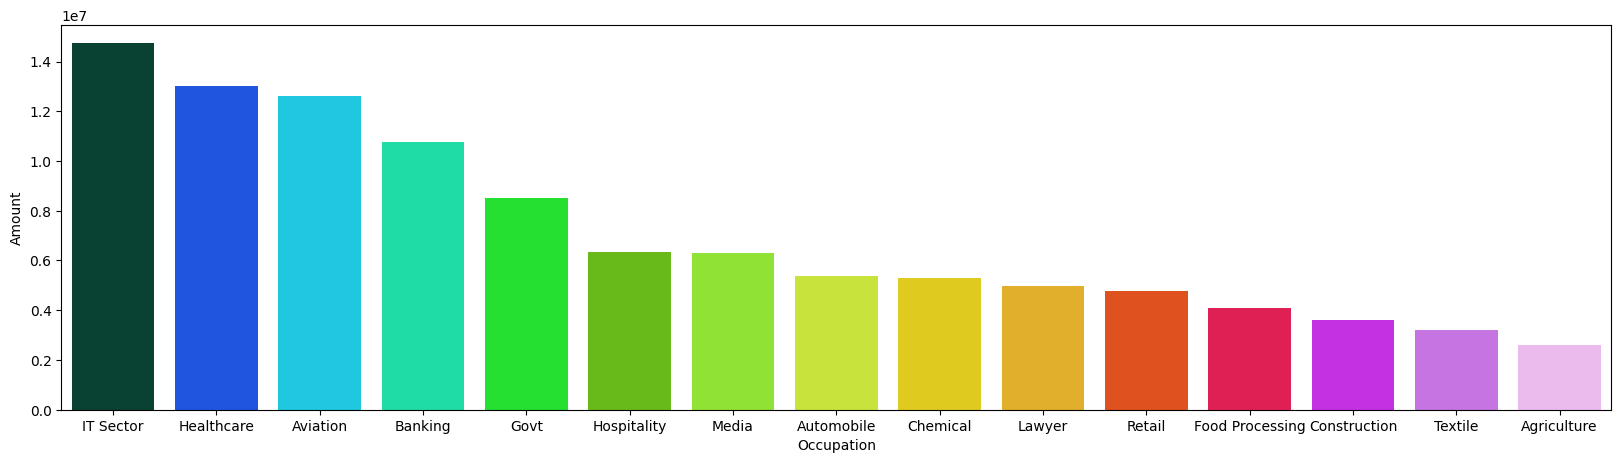

In [38]:
plt.figure(figsize = (20,5))
saleoc = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
sns.barplot(x = "Occupation", y = "Amount", data = saleoc, palette = "gist_ncar")
plt.show()

In [39]:
saleoco = df.groupby(["Occupation"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).sort_index()
saleoco

,Occupation,Orders
0,Agriculture,718
1,Automobile,1371
2,Aviation,3212
3,Banking,2817
4,Chemical,1309
5,Construction,1022
6,Food Processing,1073
7,Govt,2155
8,Healthcare,3455
9,Hospitality,1731


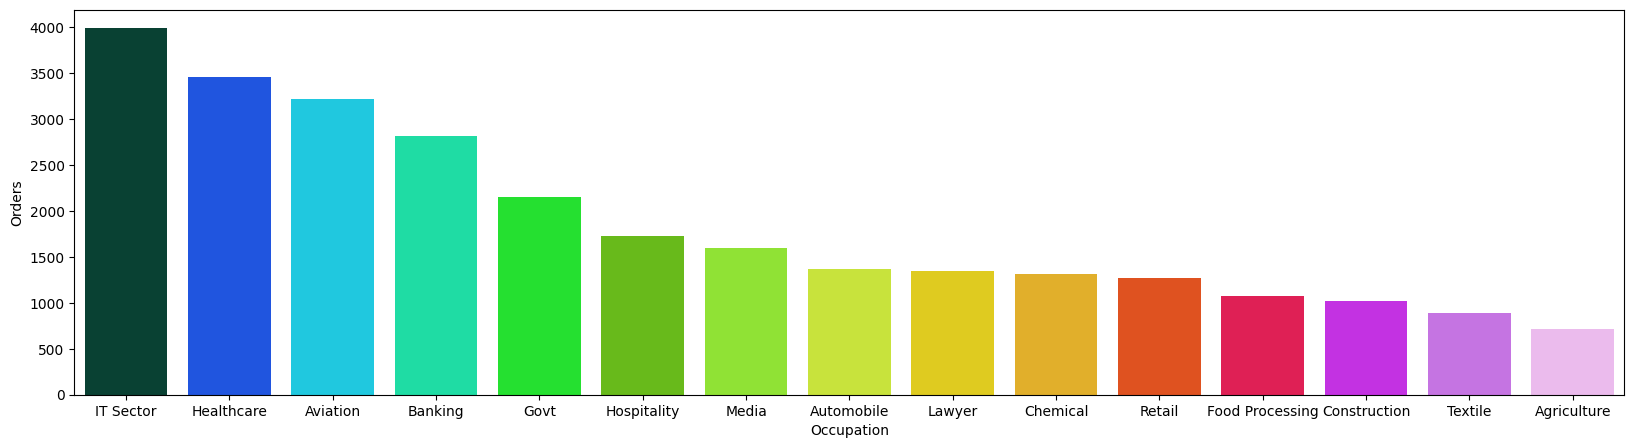

In [40]:
plt.figure(figsize=(20, 5))  # Set the size of the figure
saleoco = df.groupby(["Occupation"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)  # Grouping data by Occupation and summing up Orders
sns.barplot(x="Occupation", y="Orders", data=saleoco, palette="gist_ncar")  # Creating the bar plot
plt.show()

In [41]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Product_Category**

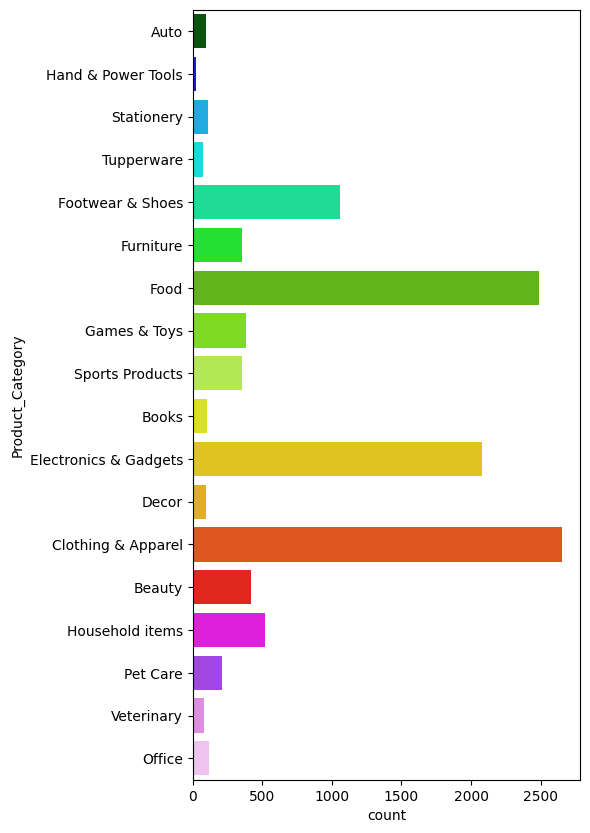

In [42]:
plt.figure(figsize = (5,10))
ad = sns.countplot(y = "Product_Category", data = df, palette = "gist_ncar")
plt.show()

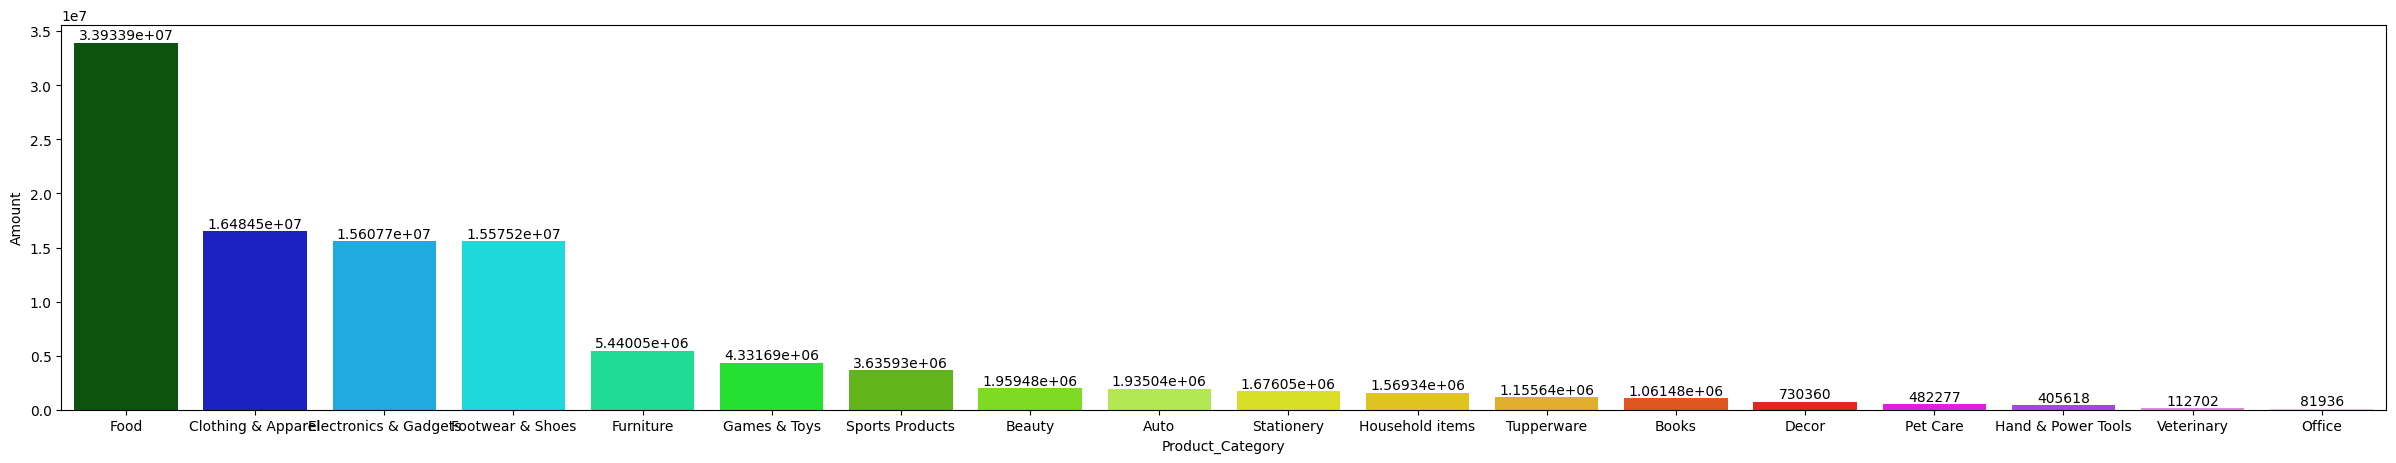

In [43]:
plt.figure(figsize = (30,5))
saleoc = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
ff = sns.barplot(x = "Product_Category", y = "Amount", data = saleoc, palette = "gist_ncar")
for i in ff.containers:
    ff.bar_label(i)
plt.show()

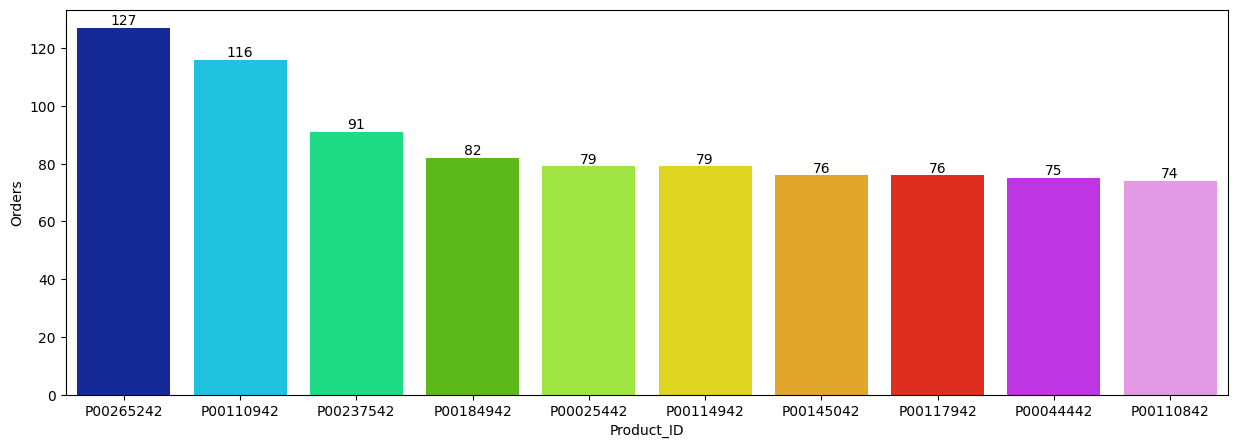

In [44]:
plt.figure(figsize = (15,5))
kk = df.groupby(["Product_ID"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)
kh = sns.barplot(x = "Product_ID", y = "Orders", data = kk, palette = "gist_ncar")
for i in kh.containers:
    kh.bar_label(i)
plt.show()